## Use DiffmahPop to generate a population of halo assembly histories

We'll do this for a sample of halos of the same present-day mass comparable to the Milky Way, $M_{\rm halo}\approx10^{12}M_{\odot},$ but the code accepts an array of variable halo masses for applications where you're generating histories for a diverse halo population.

In [1]:
from diffmah.monte_carlo_halo_population import mc_halo_population

T0 = 13.8
tarr = np.linspace(0.1, T0, 200)

logmhpop = np.zeros(500) + 12.0
halopop = mc_halo_population(tarr, T0, logmhpop)

# Collect mah_params into array of shape (n_halos, 4)
mah_params_pop = np.array((halopop.log_mah[:, -1], halopop.lgtc, halopop.early_index, halopop.late_index)).T

## Use DiffstarPop to generate a sample of galaxy histories

The `mspop.py` module generates main sequence galaxies that have never experienced a quenching event. If you explore the $M_{\rm halo}$-dependence of the SFHs generated by `mspop.py`, the scaling should be reasonable (with more massive halos hosting more massive galaxies that formed their mass preferentially at earlier times). Note, however, that at the high-mass, end too much stellar mass is produced due to the lack of quenching. Eventually we'll want to look at cosmologically representative samples of SFHs, but for now this main-sequence generator should be enough to start to get a feeling for the diversity of supernovae rates, and how these rates vary across the galaxy population. 

In [2]:
from mspop import mc_galhalo_ms_lgmpop
from jax import random as jran
ran_key = jran.PRNGKey(0)
ms_u_params_pop, ms_sfh_pop, ms_logsmh_pop = mc_galhalo_ms_lgmpop(ran_key, mah_params_pop, tarr)

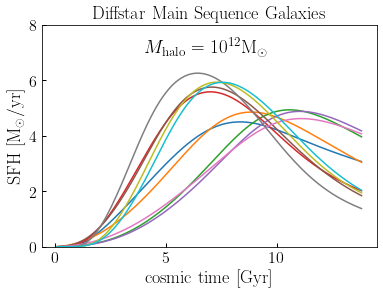

In [3]:
fig, ax = plt.subplots(1, 1)
ylim = ax.set_ylim(0, 8)
for iplot in range(0, 10):
    ih = np.random.randint(0, ms_sfh_pop.shape[0])
    __=ax.plot(tarr, ms_sfh_pop[ih, :])
    
xlabel = ax.set_xlabel(r'${\rm cosmic\ time\ [Gyr]}$')
xlabel = ax.set_title(r'${\rm Diffstar\ Main\ Sequence\ Galaxies}$')
ylabel = ax.set_ylabel(r'${\rm SFH\ [M_{\odot}/yr]}$')

a, b = 4, 7
__=ax.annotate(r'$M_{\rm halo}=10^{12}{\rm M_{\odot}}$', xy=(a, b), xytext=(a, b), size=19)

fig.savefig('example_sfhs.png', bbox_extra_artists=[xlabel, ylabel], bbox_inches='tight', dpi=200) 